#### Clustering: 
##### Apply clustering algorithms (e.g., K-means clustering) to group populations based on characteristics such as sex distribution, data collection, or sample size.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = r"E:\Data Analytics\Genome Sample\cleaned_genome_sample.xlsx"
df = pd.read_excel(file_path, header=1)

In [5]:
df.head()

,Sample name,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
0,HG00098,male,SAME123272,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes phase 3 re..."
1,HG00101,male,SAME125153,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,HG00459,male,SAME125269,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ..."
3,HG00473,female,SAME123338,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,HG00478,male,SAME123335,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [7]:
# Example: Cluster based on the number of samples in each population and other numerical features
population_size = df['Population name'].value_counts().reset_index()
population_size.columns = ['Population name', 'Sample Count']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(population_size[['Sample Count']])

In [9]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
population_size['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
print(population_size)

             Population name  Sample Count  Cluster
0           Gambian Mandinka           278        2
1                     Yoruba           187        0
2                       CEPH           184        0
3       Southern Han Chinese           171        0
4                       Esan           171        0
5                    Iberian           159        0
6                    Punjabi           154        0
7               Puerto Rican           150        0
8                  Colombian           148        0
9                    Bengali           142        0
10                  Peruvian           130        0
11                     Tamil           128        0
12                     Mende           126        0
13         African Caribbean           123        0
14           Kinh Vietnamese           122        0
15                    Telugu           118        0
16                     Luhya           115        0
17                  Gujarati           113        0
18       Afr

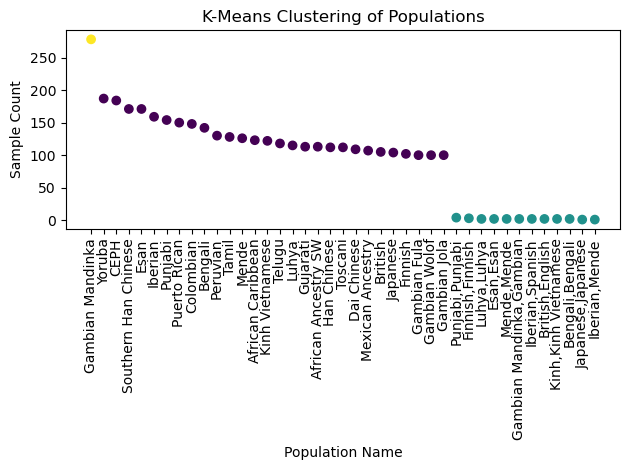

In [13]:
# Visualize the clusters
plt.scatter(population_size['Population name'], population_size['Sample Count'], c=population_size['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Populations')
plt.xlabel('Population Name')
plt.ylabel('Sample Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
